#  Tonelada métrica per cápita de emisiones de CO2

## Carga de archivo

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%ls datasets/

adult.csv                                         coches.csv
airline_data.csv                                  cwurData.csv
antropometria00.csv                               data.csv
antropometria-dataset.csv                         headbrain.csv
API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114_3.csv    mic2.xlsx
API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114.csv      mic.xlsx
API_EN.ATM.CO2E.PC_DS2_en_excel_v2_3158884_2.xls  movies.csv
API_EN.ATM.CO2E.PC_DS2_en_excel_v2_3158884.xls    nhanes_2015_2016.csv
Book3.csv                                         pokemon.csv
Canada.xlsx                                       sample_pivot.csv
Cartwheeldata.csv                                 tips.csv
census.csv                                        weight-height.csv
CO2emissions.xlsx


In [6]:
df=pd.read_excel('datasets/API_EN.ATM.CO2E.PC_DS2_en_excel_v2_3158884_2.xls',
                 sheet_name='Data',
                skiprows=range(3))

In [7]:
df.columns=list(map(str,df.columns))

In [8]:
all(isinstance(column,str)for column in df.columns)

True

In [9]:
df['Total']=df.iloc[:,5:].sum(axis=1)
df.head()
df.set_index('Country Name',inplace=True)

In [10]:
df.drop(['2019',    '2020'],
        inplace=True,
        axis=1
       )
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       'Total'],
      dtype='object')

In [11]:
años=list(map(str,range(1960,2019)))
años

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

## Introducción

Este conjunto de datos fue generado por el centro Carbon Dioxide Information Analysis Center de Tennessee en los Estados Unidos y fue extraido de la página de The World Bank.

Enlace a The World Bank para descargar: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?view=chart  

### Descripción de los datos

En este set de datos podemos encontrar las toneladas métricas de emisiones de CO2 (dioxido de carbono) de 236 paises de los años 1960-2018.

La tabla tiene las siguientes columnas:


In [12]:
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       'Total'],
      dtype='object')

* 'Country Name' es un variable cualitativa, explica los paises bajo estudio
* 'Country Code' es un variable cualitativa, explica el codigo de los paises bajo estudio
* 'Region' es una variable cualitativa, explica la región de los paises bajo estudio
* 'Income Group' es una variable cualitativa, explica el grupo de ingresos de los paises bajo estudio
* 'Indicator Name' es un variable cualitativa, explica el tipo de indicador utilizado en el estudio
* 'Indicator Code' es un variable cualitativa, explica el explica el codigo del indicador bajo estudio
* '1960' - '2018' es una variable cuantitativa, explica las cantidad de toneladas metricas de emisiones de CO2 por cada país bajo estudio

### Tabla

In [13]:
df

,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Country Name,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,AFE,0,0,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,...,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,64.274924
Afghanistan,AFG,South Asia,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,...,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,8.813541
Africa Western and Central,AFW,0,0,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,...,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,26.000799
Angola,AGO,Sub-Saharan Africa,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,...,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,40.564875
Albania,ALB,Europe & Central Asia,Upper middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,...,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732,97.965540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,East Asia & Pacific,Lower middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.135031,0.163542,0.158377,0.184037,0.208106,...,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.535642,1.631588,40.887810
"Yemen, Rep.",YEM,Middle East & North Africa,Low income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,...,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682,26.085665
South Africa,ZAF,Sub-Saharan Africa,Upper middle income,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727223,5.832621,5.887168,5.961337,6.332343,...,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645,442.350573


## Pregunta de Investigación 1: ¿Cuáles son los países que han emitido mas CO2 durante los años? ¿Cuáles son los que han emitido menos CO2?

Text(0, 0.5, 'Tonelada métrica de CO2')

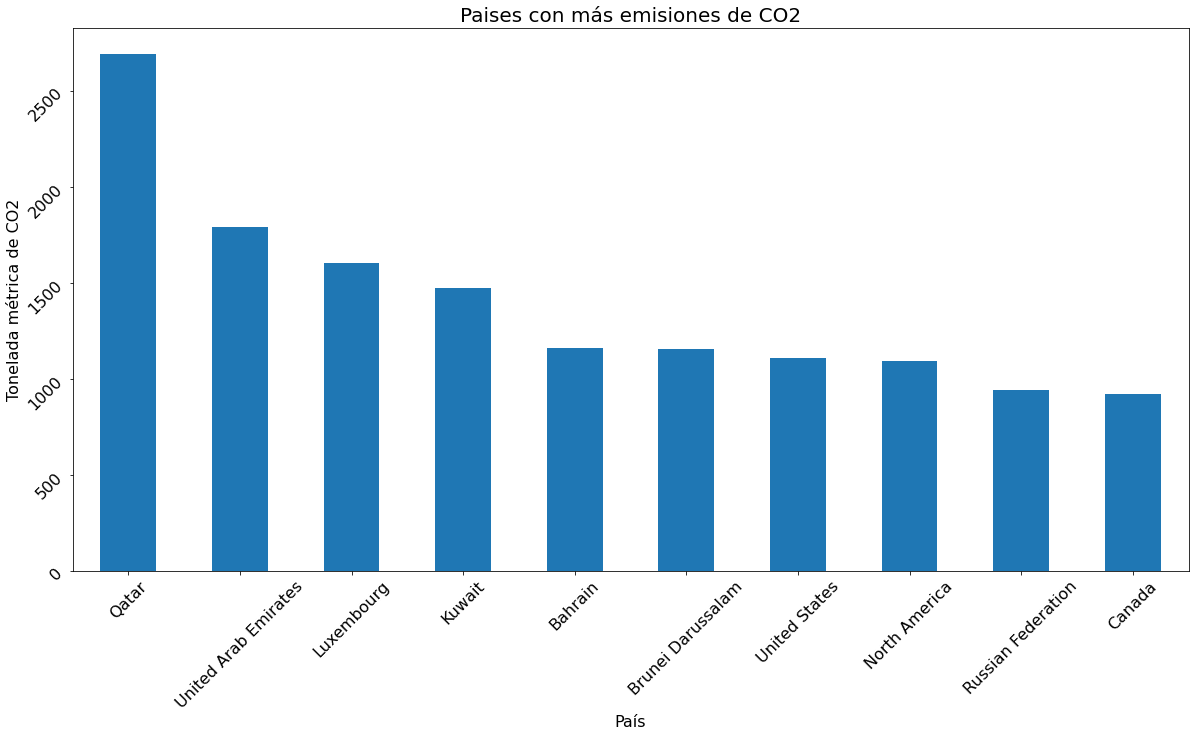

In [14]:
df_topten=df.sort_values(by='Total', 
                          ascending=False,
                          axis=0,
                         )
df_topten=df_topten.head(10)
df_topten=df_topten.loc[:,'Total']

df_topten.plot(kind='bar',figsize=(20,10))

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Paises con más emisiones de CO2', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)
#cambiar color

Text(0, 0.5, 'Tonelada métrica de CO2')

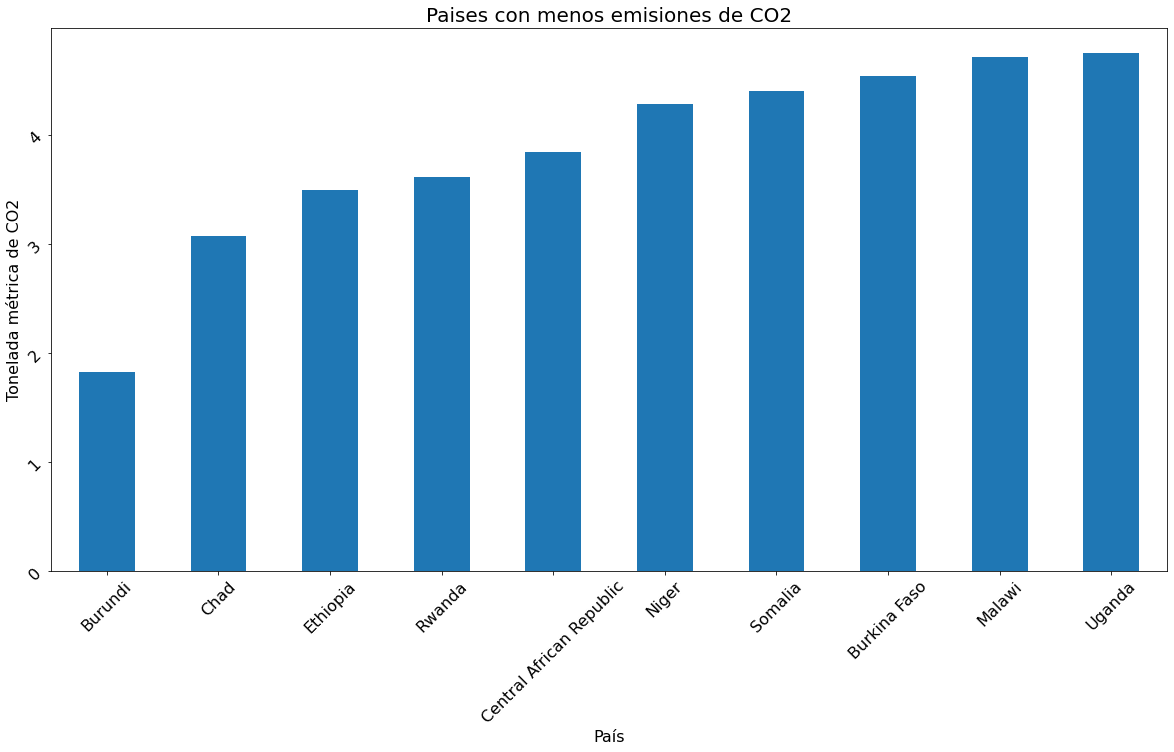

In [15]:
df_bottten=df.sort_values(by='Total', 
                          ascending=True,
                          axis=0,
                         )
df_bottten=df_bottten.head(10)
df_bottten=df_bottten.loc[:,'Total']
df_bottten.plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Paises con menos emisiones de CO2', fontsize=20)

plt.xlabel('País', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)
#cambiar color

Text(0, 0.5, 'Tonelada métrica de CO2')

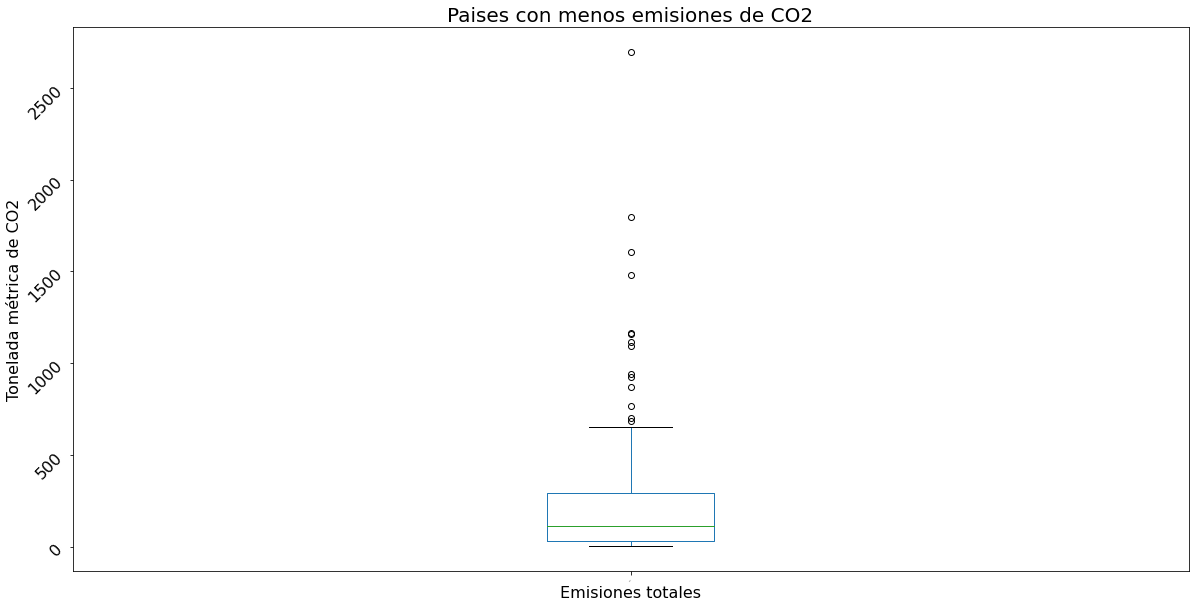

In [16]:
#sns.boxplot(data=df.loc[:,['Total']])
dftot=df.loc[:,'Total']
dftot.plot(kind='box',figsize=(20,10))
plt.xticks(fontsize=0,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Paises con menos emisiones de CO2', fontsize=20)

plt.xlabel('Emisiones totales', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)

### Conclusión

* conclusion de los que tienen mayor co2 y en un diagramad e caja se consdierarin atipicos, es edcir, son valores muy extremos
* menor: son numeros muy bajos y vemos que la mayoria (si no es que todos) pertenecen a africa, sería interesante investigar si es por que hay poca accesibilidad a esta información o si verdaderamente son paises con poca contaminación de co2 debido cuestiones del continente como su tipo de ingresos

## Pregunta de Investigación 2: ¿Hay alguna relación entre las emisiones de CO2 de los paises y sus ingresos?

Text(0, 0.5, 'Tonelada métrica de CO2')

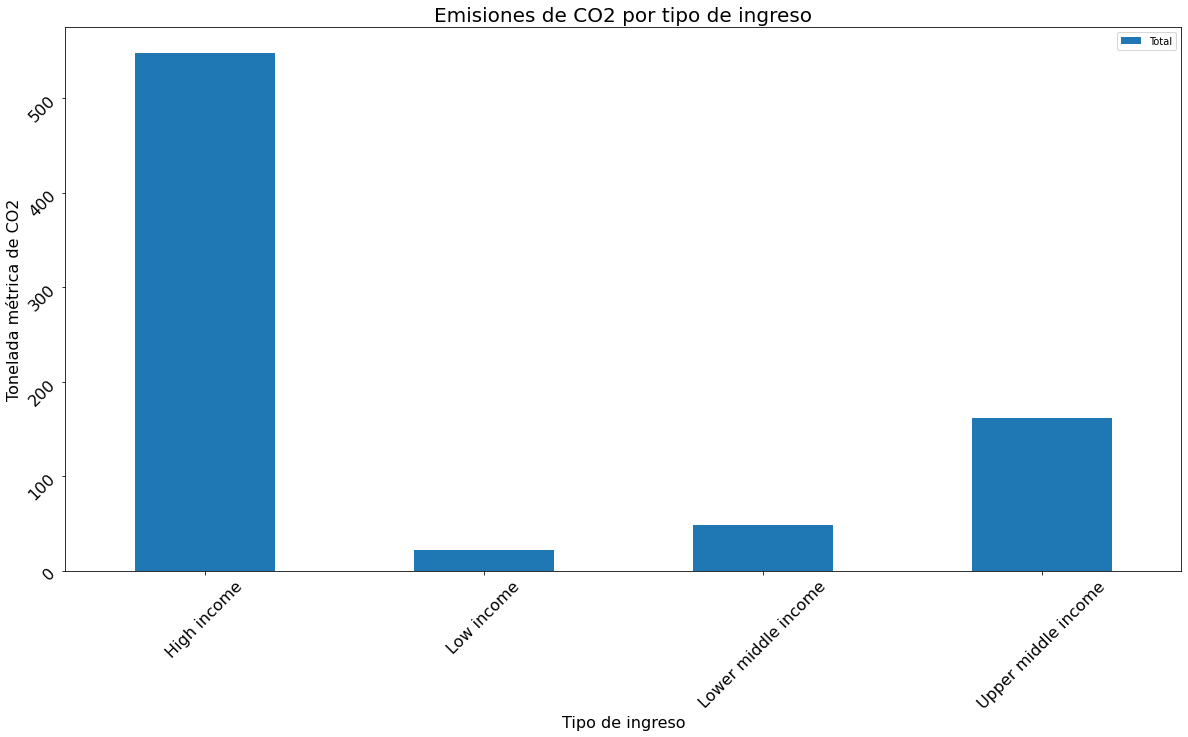

In [22]:
my_pivot=pd.pivot_table(df,
                        index='IncomeGroup',
                        values='Total',
                       )
my_pivot=my_pivot.drop(0,axis=0)
my_pivot.plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Emisiones de CO2 por tipo de ingreso', fontsize=20)

plt.xlabel('Tipo de ingreso', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)

### Conclusión

* entre mas alto el ingreso, mayores son las emisiones de CO2

## Pregunta de Investigación 3: ¿Desde que México ratificó el acuerdo de Paris en el 2016, se ha visto un cambio en sus emisiones de CO2?

In [ ]:
dfmex=df.loc['Mexico',años]

dfmex.plot(kind='line',figsize=(20,10))

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16,rotation=45)

plt.title('Emisiones de CO2 en México', fontsize=20)

plt.xlabel('Años', fontsize=16)
plt.ylabel('Tonelada métrica de CO2', fontsize=16)
plt.text(50,4,'Acuerdo de Paris', fontsize=16)
plt.show()

### Conclusión

* México tiene un tendencia que ha estado incrementando por el tiempo
* Desde el acuerdo de Paris México ha logrado tener una tendencia negativa, sería interesante obtener los datos del años 2019, 2020 yy 2021 para ver si esta tendencia sigue con el cambio de gobierno esta ha incrementado o sigue bajando

## Limitaciones

* no estan los ultimos 3 años lo cual pudiera ser interesante analizar
* no todos los paises tienen datos, hay algunos que tiene todas o casi todos los años vacios
* hay laguos paises que no tiene su region o tipo de ingreso registrado

## Siguientes pasos

* Encontrar una base de datos para complementar esta en los ultimo 3 años al igual que los paises que tienen celdas vacias
* Entregable 10